In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
oli_diff_table_mathys_valder_no_vs_path_file = "/mathys_snrna_analysis/dlpfc_snrnaseq_oli_degs.txt"
oli_diff_table_mathys_valder_no_vs_early_file = "/mathys_snrna_analysis/dlpfc_snrnaseq_oli_degs_no_vs_early.txt"

In [35]:
oli_diff_table_mathys_valder_no_vs_path = pd.read_csv(oli_diff_table_mathys_valder_no_vs_path_file, sep="\t", index_col=0)
oli_diff_table_mathys_valder_no_vs_early = pd.read_csv(oli_diff_table_mathys_valder_no_vs_early_file, sep="\t", index_col=0)

In [ ]:
dlpfc_glia_results_file = "/deseq_analysis/binary_amyloid_deseq/glia_dlpfc_binary_amyloid_results_sorted.txt"

In [37]:
dlpfc_glia_results_table = pd.read_csv(dlpfc_glia_results_file, sep="\t", skiprows=1, header=None, names=["PeakID","baseMean","log2FoldChange","lfcSE","stat","pvalue","padj"], index_col=0)

In [ ]:
peaks2GenesFile = "dlpfc_hpc_combined_set_combined_200_name_homer_gene_annot.txt"

In [39]:
peaks2GenesTable = pd.read_csv(peaks2GenesFile, sep="\t", index_col=0)

In [40]:
results_and_peaks2genes = pd.merge(peaks2GenesTable,
                 dlpfc_glia_results_table, left_index=True, right_index=True)

In [41]:
promoter_results_and_peaks2genes = results_and_peaks2genes.loc[abs(results_and_peaks2genes["Distance to TSS"])<5000, ]

In [42]:
promoter_results_and_peaks2genes_significant = promoter_results_and_peaks2genes.loc[promoter_results_and_peaks2genes["padj"]<0.05]

In [43]:
promoter_results_and_peaks2genes_significant.index = promoter_results_and_peaks2genes_significant["Gene Name"]

In [44]:
promoter_k27ac_results_peaks2genes_and_no_vs_path_expr = pd.merge(promoter_results_and_peaks2genes_significant,
                 oli_diff_table_mathys_valder_no_vs_path, left_index=True, right_index=True)
promoter_k27ac_results_peaks2genes_and_no_vs_early_expr = pd.merge(promoter_results_and_peaks2genes_significant,
                 oli_diff_table_mathys_valder_no_vs_early, left_index=True, right_index=True)

In [45]:
promoter_k27ac_results_peaks2genes_and_no_vs_path_expr.shape

(500, 32)

In [46]:
promoter_k27ac_results_peaks2genes_and_no_vs_early_expr.shape

(495, 32)

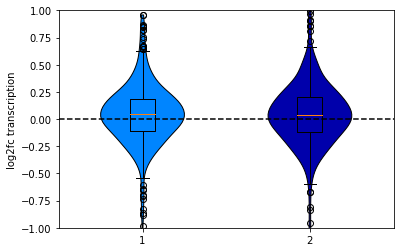

In [48]:
fig, ax = plt.subplots()

parts = ax.violinplot(dataset=[promoter_k27ac_results_peaks2genes_and_no_vs_path_expr["IndModel.FC"].to_numpy(dtype='float32'),
                        promoter_k27ac_results_peaks2genes_and_no_vs_early_expr["IndModel.FC"].to_numpy(dtype='float32')],showmedians=False,showextrema=False)

parts['bodies'][0].set_facecolor('#0085ffff')
parts['bodies'][0].set_edgecolor('black')
parts['bodies'][0].set_alpha(1)

parts['bodies'][1].set_facecolor('#0000abff')
parts['bodies'][1].set_edgecolor('black')
parts['bodies'][1].set_alpha(1)    


plt.boxplot(x=[promoter_k27ac_results_peaks2genes_and_no_vs_path_expr["IndModel.FC"].to_numpy(dtype='float32'),
               promoter_k27ac_results_peaks2genes_and_no_vs_early_expr["IndModel.FC"].to_numpy(dtype='float32')])
plt.ylabel("log2fc transcription")
plt.ylim(-1,1)
plt.axhline(y=0,linestyle='--',c='k')
plt.savefig("oli_dlpfc_peaks_l2fc_violins.svg")

In [49]:
from scipy.stats import ttest_1samp
import numpy as np
print(ttest_1samp(promoter_k27ac_results_peaks2genes_and_no_vs_path_expr["IndModel.FC"],0))
print(np.mean(promoter_k27ac_results_peaks2genes_and_no_vs_path_expr["IndModel.FC"]))

Ttest_1sampResult(statistic=2.6594641211072716, pvalue=0.008078140376998381)
0.035729816964


In [50]:
from scipy.stats import ttest_1samp
import numpy as np
print(ttest_1samp(promoter_k27ac_results_peaks2genes_and_no_vs_early_expr["IndModel.FC"].to_numpy("float32"),0))
print(np.mean(promoter_k27ac_results_peaks2genes_and_no_vs_early_expr["IndModel.FC"].to_numpy("float32")))

Ttest_1sampResult(statistic=2.135051656612883, pvalue=0.033248151068009206)
0.03170981
